In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import sys
from numpy.linalg import inv
import math
from dateutil.parser import parse
import matplotlib.pyplot as plt
from dateutil.parser import parse

from scipy import stats

In [2]:
train_df = pd.read_csv("../input/train_1.csv")

page_details = pd.DataFrame([i.split("_")[-3:] for i in train_df["Page"]])
page_details.columns = ["project", "access", "agent"]

train_df = page_details.merge(train_df, how="inner", left_index=True, right_index=True)
enWiki_df = train_df.groupby('project').get_group('en.wikipedia.org').groupby('agent').get_group('all-agents')

In [3]:
def findIndex(name):
    count,__ = train_df.shape
    for i in range(count):
        if train_df.iloc[i,3] == name:
            return i

In [4]:

def hasNaN(u):
    row, col = u.shape
    for i in range(col):
        if np.isnan(u[0,i]):
            return True
    return False




Input Processing

In [16]:

def plot_differences(pageNo):
    print 'Page Name: ', enWiki_df.iloc[pageNo,3]
    num = findIndex(enWiki_df.iloc[pageNo,3])
    
    signal = np.matrix(train_df.iloc[num,4:].values)
    if hasNaN(signal):
         raise Exception('Some nan values found !')

    u = signal[:]

    _, length = signal.shape
    siglen = length 

    minimum, maximum = signal.min(), signal.max()

    RESCALED_MAX = 5
    ROUND = 5
    powerRaise = round( math.log(RESCALED_MAX, max(train_df.iloc[num,4:].values)), ROUND)

    print "Min:",minimum , "Max:", maximum
    print "Power to be raised:", powerRaise

    EXPECTED_MIN =2
    shift =0 
    mean1, mean2, sd1, sd2 = 0,0,1,1

    if minimum <= EXPECTED_MIN:
        shift = EXPECTED_MIN

    def inputmapping_1(x):
        global mean1
        global sd1
        scaled_shifted_sig, mean1, sd1 = helper_inputmapping_1(x)
        return scaled_shifted_sig

    def inputmapping_2(x):
        global mean2
        global sd2
        scaled_shifted_sig, mean2, sd2 = helper_inputmapping_2(x)
        return scaled_shifted_sig

    def helper_inputmapping_1(x):   # maps the input to zero mean however does not save the mean to global variable        
        scaled_sig = np.power(x.astype(float)+shift,powerRaise)
        mean = np.mean(scaled_sig)
        sd = np.std(scaled_sig.astype(float)  , ddof=1)
        return (scaled_sig - mean)/sd, mean,sd

    def helper_inputmapping_2(x):   # maps the input to zero mean however does not save the mean to global variable        
        scaled_sig = x+shift
        mean = np.mean(scaled_sig)
        sd = np.std(scaled_sig.astype(float)  , ddof=1)
        return (scaled_sig - mean)/sd, mean,sd



    def invinputmapping_1(y):
        return np.power(y * sd1 + mean1, 1/powerRaise) - shift

    def invinputmapping_2(y):
        return np.power(y * sd2 + mean2, 1) - shift
    
    fig2 = plt.figure()
    plt.plot(inputmapping_1(signal.astype(float)).T)
    plt.plot(inputmapping_2(u.astype(float)).T)
    plt.xlabel('day')
    plt.ylabel('No. of views')

Page Name:  2002_FIFA_World_Cup_en.wikipedia.org_desktop_all-agents
Min: 596.0 Max: 7066.0
Power to be raised: 0.18159


<IPython.core.display.Javascript object>


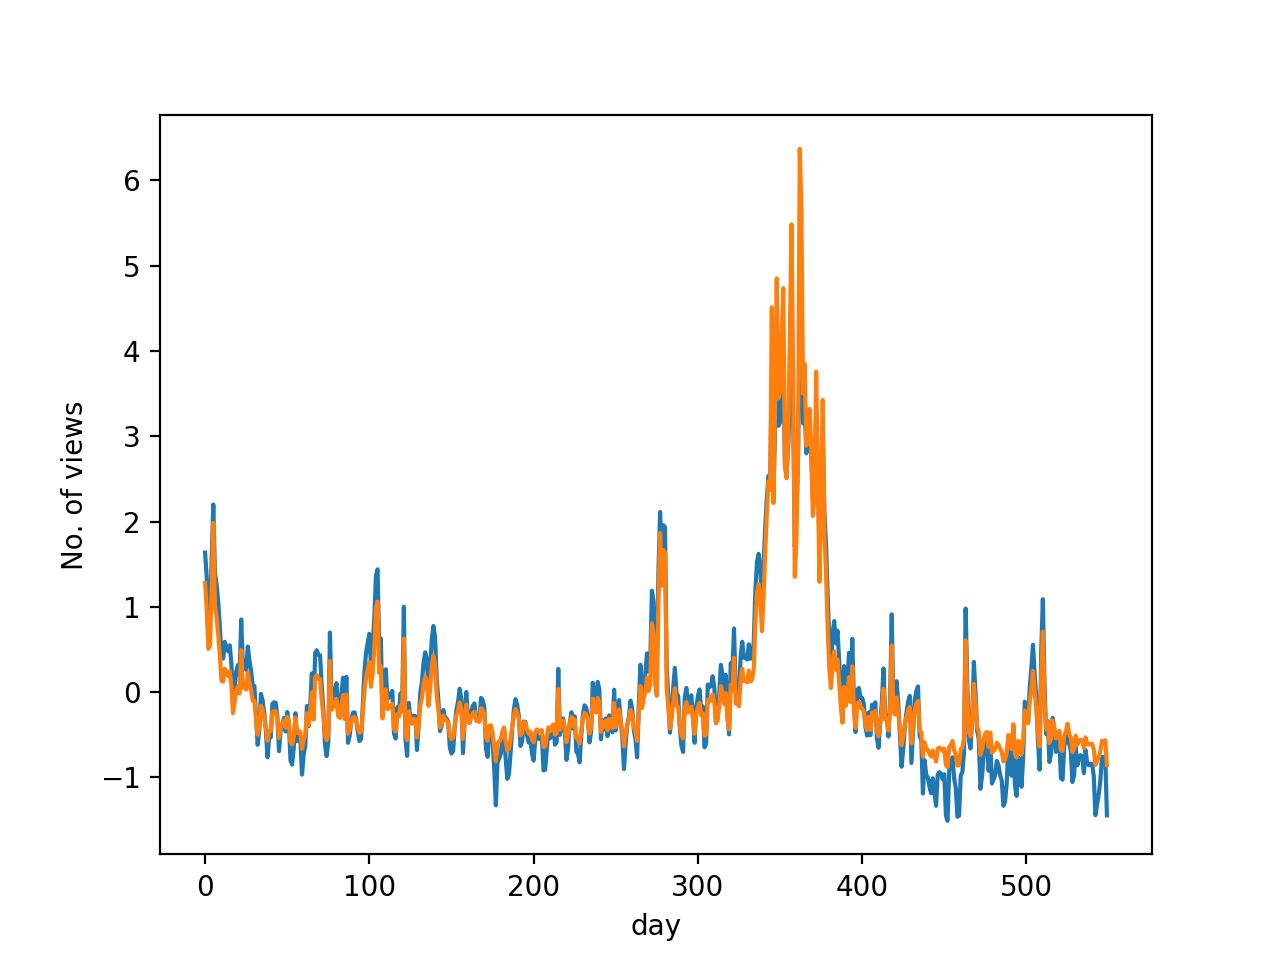

In [13]:
plot_differences(19)

Page Name:  1989_(Taylor_Swift_album)_en.wikipedia.org_desktop_all-agents
Min: 813.0 Max: 35920.0
Power to be raised: 0.15344


<IPython.core.display.Javascript object>


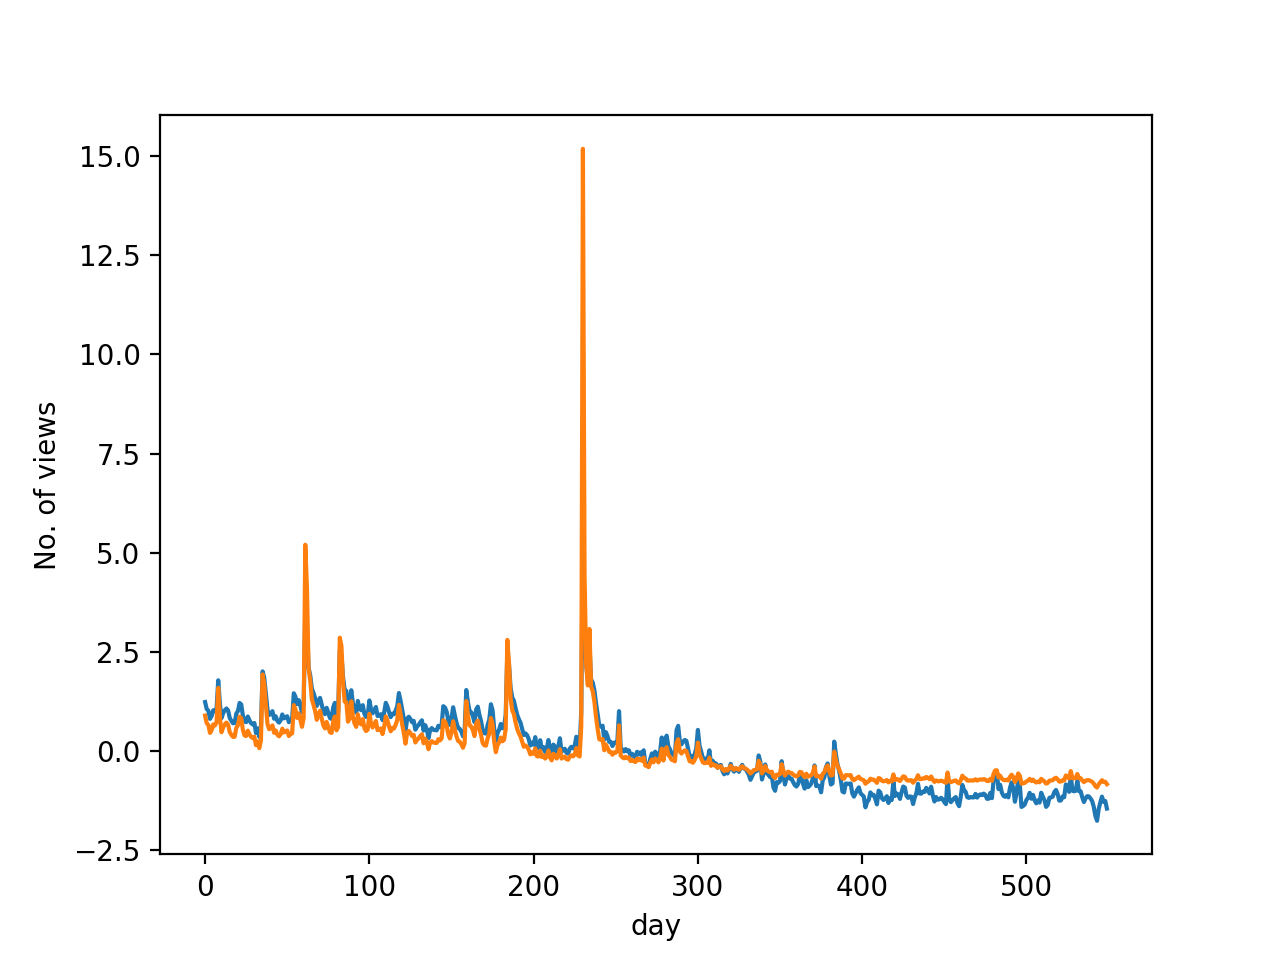

In [12]:
plot_differences(16)

Page Name:  2002_FIFA_World_Cup_en.wikipedia.org_desktop_all-agents
Min: 596.0 Max: 7066.0
Power to be raised: 0.18159


<IPython.core.display.Javascript object>


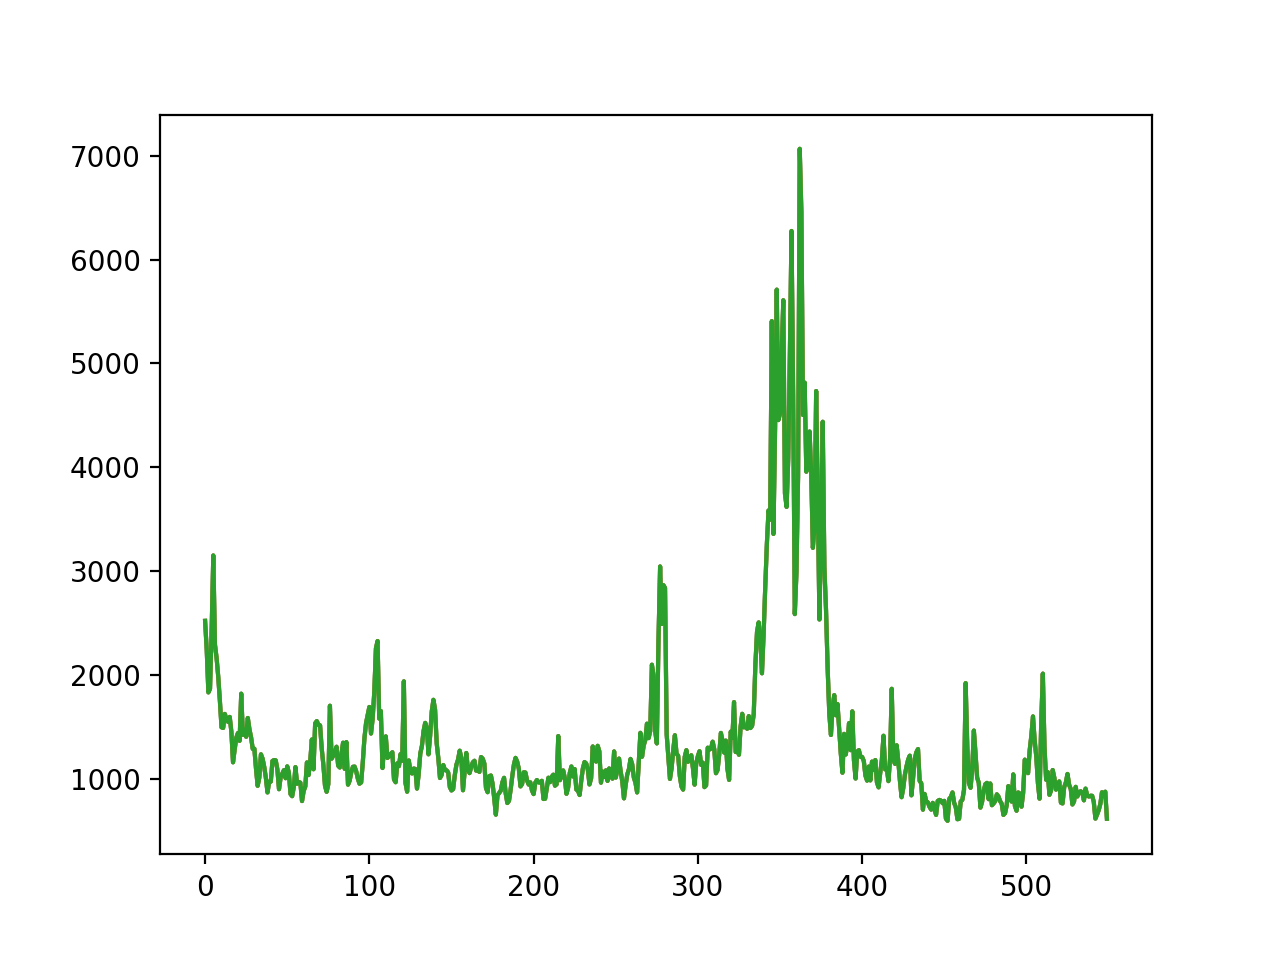

Both orginal signal and the reconstructed signals are perfectly aligned. Therefore the mapping and reverse mapping fucntions are correct


In [25]:
# Signal reconstruction
pageNo = 19
print 'Page Name: ', enWiki_df.iloc[pageNo,3]
num = findIndex(enWiki_df.iloc[pageNo,3])

signal = np.matrix(train_df.iloc[num,4:].values)
if hasNaN(signal):
     raise Exception('Some nan values found !')

u = signal[:]

_, length = signal.shape
siglen = length 

minimum, maximum = signal.min(), signal.max()

RESCALED_MAX = 5
ROUND = 5
powerRaise = round( math.log(RESCALED_MAX, max(train_df.iloc[num,4:].values)), ROUND)

print "Min:",minimum , "Max:", maximum
print "Power to be raised:", powerRaise

EXPECTED_MIN =2
shift =0 
mean1, mean2, sd1, sd2 = 0,0,1,1

if minimum <= EXPECTED_MIN:
    shift = EXPECTED_MIN
def inputmapping_1(x):
    global mean1
    global sd1
    scaled_shifted_sig, mean1, sd1 = helper_inputmapping_1(x)
    return scaled_shifted_sig

def inputmapping_2(x):
    global mean2
    global sd2
    scaled_shifted_sig, mean2, sd2 = helper_inputmapping_2(x)
    return scaled_shifted_sig

def helper_inputmapping_1(x):   # maps the input to zero mean however does not save the mean to global variable        
    scaled_sig = np.power(x.astype(float)+shift,powerRaise)
    mean = np.mean(scaled_sig)
    sd = np.std(scaled_sig.astype(float)  , ddof=1)
    return (scaled_sig - mean)/sd, mean,sd

def helper_inputmapping_2(x):   # maps the input to zero mean however does not save the mean to global variable        
    scaled_sig = x+shift
    mean = np.mean(scaled_sig)
    sd = np.std(scaled_sig.astype(float)  , ddof=1)
    return (scaled_sig - mean)/sd, mean,sd

def invinputmapping_1(y):
    return np.power(y * sd1 + mean1, 1/powerRaise) - shift

def invinputmapping_2(y):
    return np.power(y * sd2 + mean2, 1) - shift

plt.plot(signal.T)
plt.plot(invinputmapping_1( inputmapping_1(signal.astype(float)).T))
plt.plot(invinputmapping_2( inputmapping_2(u.astype(float)).T))
print "Both orginal signal and the reconstructed signals are perfectly aligned. Therefore the mapping and reverse mapping fucntions are correct"